Q1. Build linear and logistic regression using gradient descent on numpy only (Do not use other libraries like sklearn). Dataset for linear regressions can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Dataset for logistic regression can be found [here](https://drive.google.com/file/d/1CReNesgs3iqZi08rr5a1h0YOci0BmC6H/view). The main focus here is not the accuracy of the model but the implementation of these algorithms from scratch. 

Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view). \
[movie_metadata.csv](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
# df = pd.read_csv(r"C:\Users\KUDSIT\Desktop\rahul\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
# df.head()

df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data stats

In [ ]:
# df['quality'].value_counts()

In [ ]:
# df.describe()

In [ ]:
# df.shape

### preprocessing

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# No missing / Null value in either rows or columns

dub_df=df.copy()
dub_df.drop_duplicates(subset=None,inplace=True)

print(dub_df.shape)
print(df.shape)

# The shape is not same. Hence there were duplicate values in the dataset
df=dub_df

(1359, 12)
(1599, 12)


### data visualization

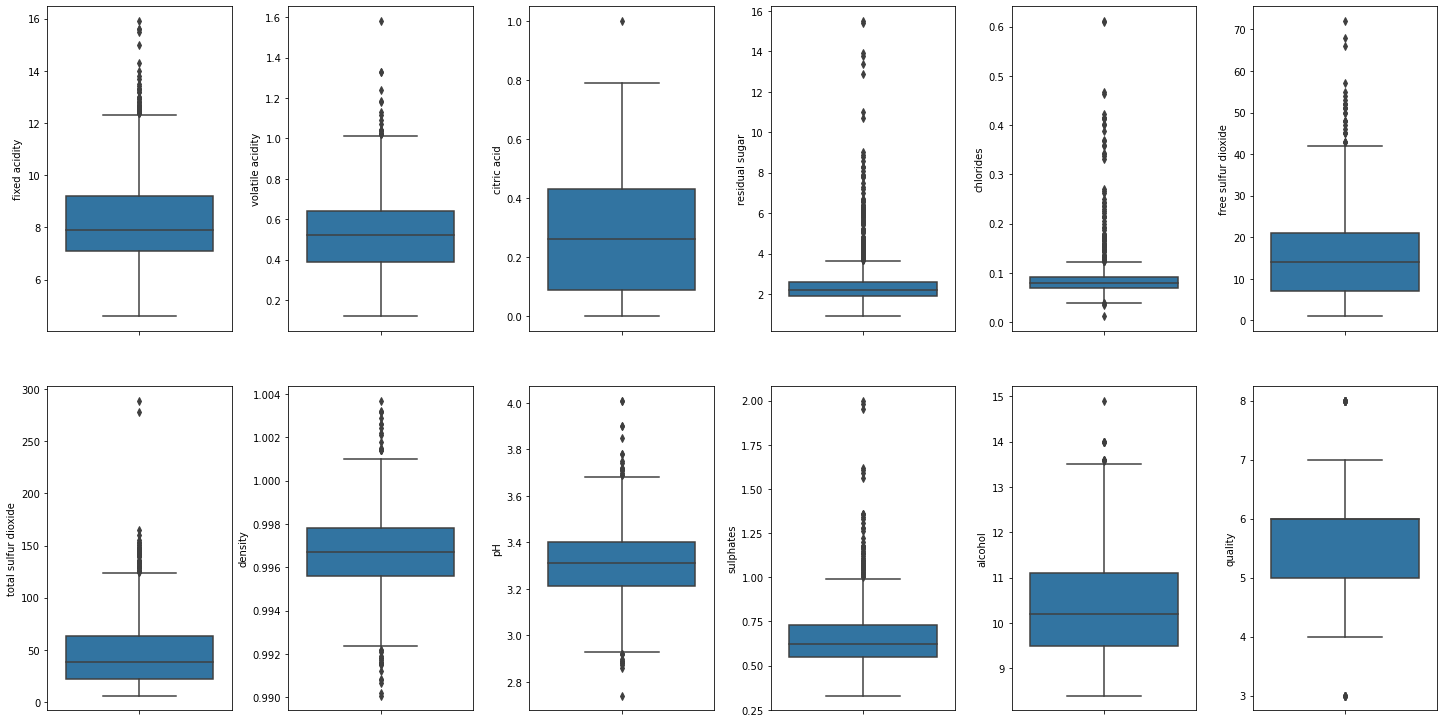

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

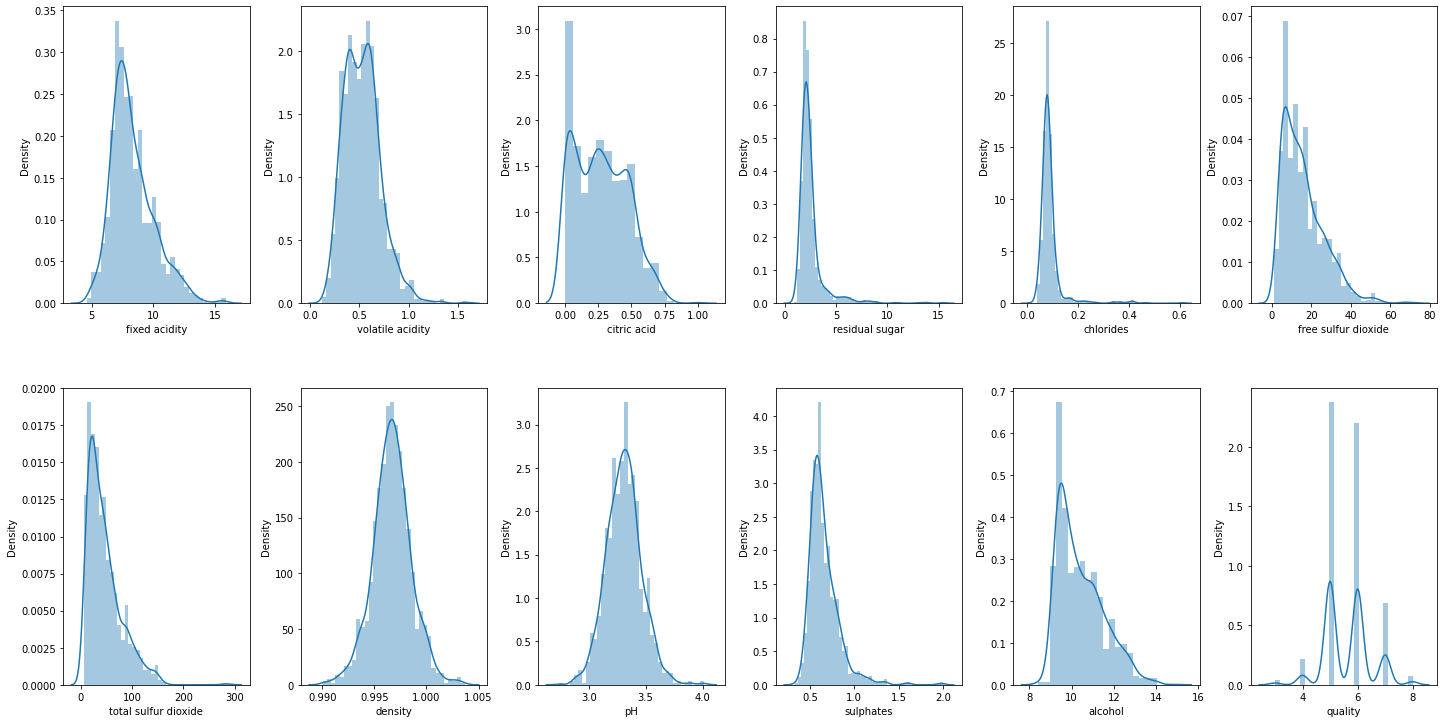

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

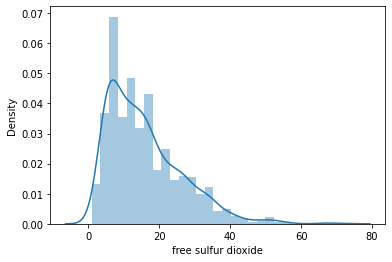

In [ ]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

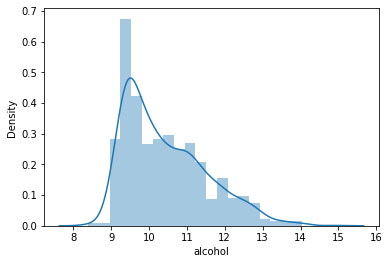

In [ ]:
sns.distplot(df['alcohol'])


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

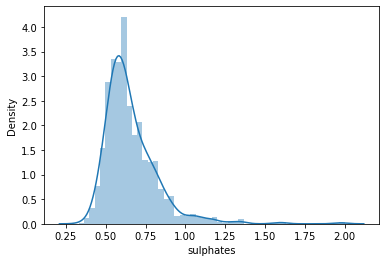

In [ ]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

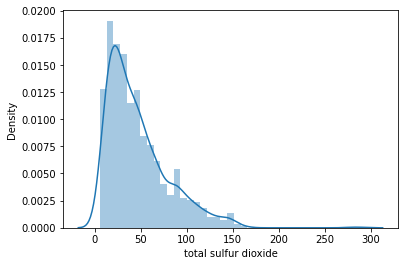

In [ ]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

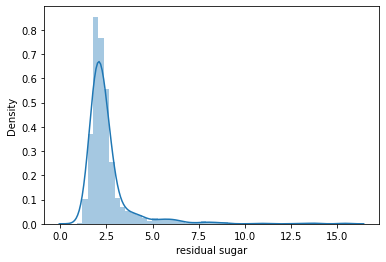

In [ ]:
sns.distplot(df["residual sugar"])

AxesSubplot(0.125,0.125;0.775x0.755)


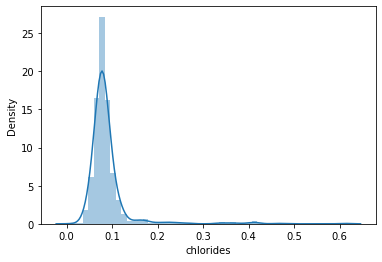

In [ ]:
print(sns.distplot(df["chlorides"]))

In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])
df['alcohol'] = np.log(1+df['alcohol'])
df['sulphates'] = np.log(1+df['sulphates'])
df['total sulfur dioxide'] = np.log(1+df['total sulfur dioxide'])
df['residual sugar'] = np.log(1+df['residual sugar'])
df['chlorides'] = np.log(1+df['chlorides'])


AxesSubplot(0.125,0.125;0.775x0.755)


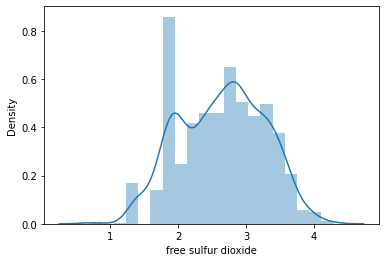

In [ ]:
print(sns.distplot(df['free sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


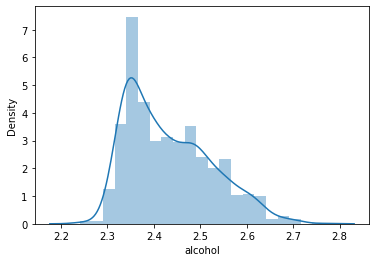

In [ ]:
print(sns.distplot(df['alcohol']))

AxesSubplot(0.125,0.125;0.775x0.755)


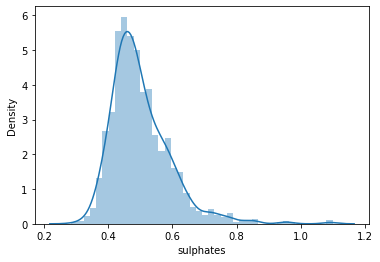

In [ ]:
print(sns.distplot(df['sulphates']))

AxesSubplot(0.125,0.125;0.775x0.755)


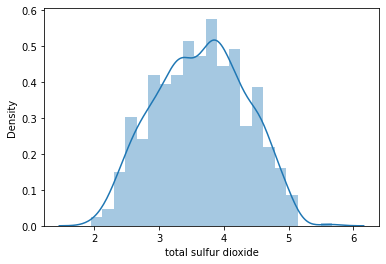

In [ ]:
print(sns.distplot(df['total sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


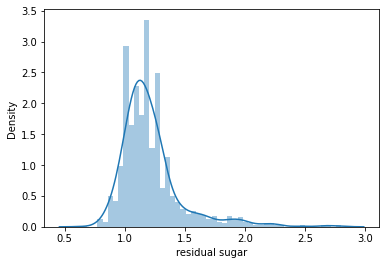

In [ ]:
print(sns.distplot(df['residual sugar']))

AxesSubplot(0.125,0.125;0.775x0.755)


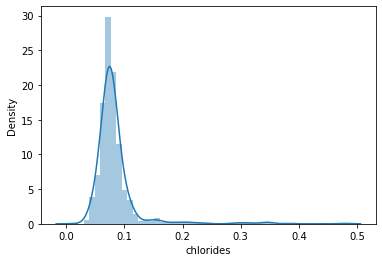

In [ ]:
print(sns.distplot(df['chlorides']))

In [ ]:
# round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)
# round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

<AxesSubplot:xlabel='quality', ylabel='count'>

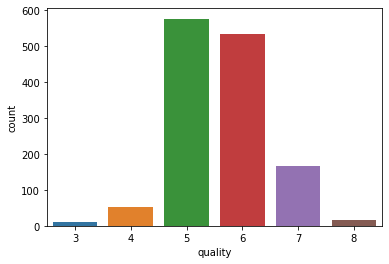

In [ ]:
sns.countplot(df['quality'])

### model creation

In [6]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,:11]
y = df['quality']
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
x_train = X_scaler.fit_transform(x_train)
#y_train = y_scaler.fit_transform(y_train)
x_test = X_scaler.transform(x_test)
#y_test = y_scaler.transform(y_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [8]:
# y_train = y_scaler.fit_transform(y_train)
# y_test=y_scaler.fit_transform(y_test)

In [9]:
# def Normalizer(data):
#     data = data.apply( lambda value:(value - value.mean())/value.std(), axis =0)

#     return np.array(data)

In [10]:
# x_train = Normalizer(x_train)
# x_test = Normalizer(x_test)
# np.array(x_train).reshape(-1,1)

In [9]:
x_train

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.90236307,  0.35241996],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.86300883, -0.93981891],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.25543745, -0.2013967 ],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
        -0.03916861, -0.75521335],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.62762591, -0.01679115],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.62762591,  0.90623661]])

In [10]:
x_train

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.90236307,  0.35241996],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.86300883, -0.93981891],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.25543745, -0.2013967 ],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
        -0.03916861, -0.75521335],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.62762591, -0.01679115],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.62762591,  0.90623661]])

In [11]:
y_train

array([[6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [4],
       [6],
       [5],
       [6],
       [7],
       [5],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [6],
       [4],
       [5],
       [5],
       [5],
       [7],
       [5],
       [6],
       [6],
       [6],
       [6],
       [7],
       [5],
       [6],
       [5],
       [6],
       [5],
       [6],
       [7],
       [6],
       [7],
       [6],
       [5],
       [6],
       [7],
       [5],
       [5],
       [5],
       [4],
       [5],
       [7],
       [7],
       [6],
       [4],
       [6],
       [5],
       [6],
       [8],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [7],
       [8],
       [6],
       [7],
       [6],
       [5],
       [5],
       [5],
    

In [12]:
x_test

array([[-0.35421567,  0.51724945, -1.191325  , ...,  0.20919976,
        -0.74531737, -0.84751613],
       [-0.06291586,  0.60206053, -0.88415372, ..., -0.12550578,
         0.54928869,  0.44472273],
       [ 0.05360407, -0.89626845,  0.80528833, ..., -0.92879908,
         0.90236307,  0.72163106],
       ...,
       [ 0.34490388,  0.3476273 ,  0.60050747, ...,  0.41002309,
        -0.45108872, -0.10909392],
       [ 0.9275035 , -1.17897203,  1.4708261 , ..., -1.0626813 ,
         0.43159723,  0.90623661],
       [ 1.04402343, -1.23551274,  0.39572662, ..., -0.46021132,
         1.02005453,  0.72163106]])

In [13]:
# y_test=y_scaler.fit_transform(y_test)
# y_test

## Liner Regression


In [23]:
X1 = x_train
Y1 = y_train

In [15]:
# Building the model
m = 0
b = 0

L = 0.005  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = len(X1) # Number of elements in X1
costs = []
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X1 + b  # The current predicted value of Y1
    cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
    cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_m = (-2/n) * np.sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(Y1 - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_c  # Update b
    print("cost {}, epochs {}".format(cost,i))
print (m, b)

cost 355.4584647739222, epochs 0
cost 283.10948751048835, epochs 1
cost 225.80186262012236, epochs 2
cost 180.40849294446352, epochs 3
cost 144.45240482437413, epochs 4
cost 115.97158742445133, epochs 5
cost 93.41193196197248, epochs 6
cost 75.54242887014298, epochs 7
cost 61.387995471104816, epochs 8
cost 50.1762687757267, epochs 9
cost 41.29546006031769, epochs 10
cost 34.260971476842215, epochs 11
cost 28.68895306987129, epochs 12
cost 24.275357289709618, epochs 13
cost 20.77934807224356, epochs 14
cost 18.010159171088706, epochs 15
cost 15.81668464248394, epochs 16
cost 14.0792334683761, epochs 17
cost 12.702998393365279, epochs 18
cost 11.612882590449217, epochs 19
cost 10.749401862959408, epochs 20
cost 10.065438778714727, epochs 21
cost 9.523671619684515, epochs 22
cost 9.094537853016684, epochs 23
cost 8.754620996439094, epochs 24
cost 8.485372854343984, epochs 25
cost 8.272101400990445, epochs 26
cost 8.10316908278911, epochs 27
cost 7.969357793541831, epochs 28
cost 7.8633658

In [16]:
# Making predictions
Y_pred = m*X1 + b
print(Y_pred)

[[5.65369428 5.61866892 5.64062901 ... 5.60698505 5.63248542 5.62765334]
 [5.62912301 5.62115289 5.62263593 ... 5.61521955 5.61697397 5.61629908]
 [5.64601576 5.62115289 5.64062901 ... 5.60580869 5.63558771 5.62278723]
 ...
 [5.61683737 5.62164969 5.61588853 ... 5.62404222 5.62421265 5.61792112]
 [5.6275873  5.61419776 5.62623455 ... 5.6163959  5.61904216 5.62440927]
 [5.62861111 5.61519135 5.63118265 ... 5.61698408 5.61904216 5.63251946]]


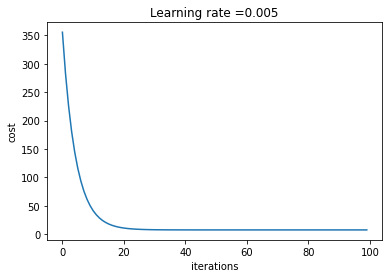

In [17]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(L))
plt.show()


## Logistic Regression

In [24]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

In [27]:
# Building the model
m = 0
b = 0

L = 0.005  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = len(X1) # Number of elements in X1
costs = []
# Performing Gradient Descent 
for i in range(epochs): 
    # sigmoid(np.dot(m.T,X1) + b)
    Y_pred = sigmoid(np.dot(m,X1) + b)  # The current predicted value of Y1
    cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
    cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_m = (-2/n) * np.sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(Y1 - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_c  # Update b
    print("cost {}, epochs {}".format(cost,i))
print (m, b)

cost 296.33780231335436, epochs 0
cost 281.0646737563345, epochs 1
cost 268.56552473482384, epochs 2
cost 259.4192022943131, epochs 3
cost 253.2140273770724, epochs 4
cost 249.200571300753, epochs 5
cost 246.67926104406925, epochs 6
cost 245.12288135436916, epochs 7
cost 244.17219495959446, epochs 8
cost 243.5951341093216, epochs 9
cost 243.24618321725077, epochs 10
cost 243.03564942521294, epochs 11
cost 242.90880021716325, epochs 12
cost 242.83243450071183, epochs 13
cost 242.78648341972075, epochs 14
cost 242.7588417080125, epochs 15
cost 242.74221687545366, epochs 16
cost 242.73221909538702, epochs 17
cost 242.72620704862376, epochs 18
cost 242.72259191189085, epochs 19
cost 242.72041812278815, epochs 20
cost 242.7191110360362, epochs 21
cost 242.71832509825836, epochs 22
cost 242.71785252393914, epochs 23
cost 242.71756837165876, epochs 24
cost 242.71739751505268, epochs 25
cost 242.71729478149646, epochs 26
cost 242.7172330093098, epochs 27
cost 242.71719586657738, epochs 28
cost

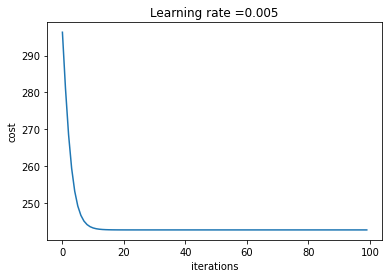

In [28]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(L))
plt.show()

### Method 1

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

In [18]:
X1 = x_train
Y1 = y_train

![MarineGEO circle logo](https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG "Logistic Regression fromula")

In [19]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

In [20]:
# Building the model
w = np.zeros(X1.shape[0])
b = 0
L = 0.00001  # The learning Rate
epochs = 300  # The number of iterations to perform gradient descent
n = len(X1) # Number of elements in X1
costs = []


# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = sigmoid(np.dot(w.T,X1) + b)  # The current predicted value of Y1 
    # cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
    # Y_pred = sigmoid(np.dot(w,X1) + b)
    cost = -(np.sum((np.log(Y_pred)*Y1)+((1-Y1)*(np.log(1-Y_pred)))))/n
    # cost = -np.mean(Y1*(np.log(Y_pred))-(1-Y1)*np.log(1-Y_pred))
    # loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_w = (np.dot(X1,(Y_pred-Y1).T))/n  # Derivative wrt w
    D_c = (np.sum(Y_pred-Y1))/n  # Derivative wrt b
    w = w - (L * D_w)  # Update w
    b = b - (L * D_c)  # Update b
    print("cost {}, epochs {}".format(cost,i))
print (w, b)

cost 7.624618986159399, epochs 0
cost 7.589405817169013, epochs 1
cost 7.554194794937343, epochs 2
cost 7.518985919332637, epochs 3
cost 7.483779190222712, epochs 4
cost 7.448574607474988, epochs 5
cost 7.413372170956434, epochs 6
cost 7.378171880533633, epochs 7
cost 7.342973736072736, epochs 8
cost 7.307777737439469, epochs 9
cost 7.272583884499151, epochs 10
cost 7.237392177116683, epochs 11
cost 7.202202615156536, epochs 12
cost 7.167015198482786, epochs 13
cost 7.131829926959061, epochs 14
cost 7.096646800448601, epochs 15
cost 7.061465818814216, epochs 16
cost 7.026286981918291, epochs 17
cost 6.9911102896228146, epochs 18
cost 6.955935741789336, epochs 19
cost 6.92076333827901, epochs 20
cost 6.885593078952552, epochs 21
cost 6.850424963670288, epochs 22
cost 6.815258992292097, epochs 23
cost 6.780095164677475, epochs 24
cost 6.744933480685478, epochs 25
cost 6.709773940174748, epochs 26
cost 6.674616543003526, epochs 27
cost 6.639461289029633, epochs 28
cost 6.604308178110463, 

In [21]:
# Making predictions
Y_pred = sigmoid(np.dot(m,X1) + b)
print(Y_pred)

[[0.54921125 0.54052565 0.54597454 ... 0.53762253 0.54395511 0.54275617]
 [0.54312088 0.5411425  0.54151073 ... 0.53966885 0.54010467 0.53993703]
 [0.54730951 0.5411425  0.54597454 ... 0.53733009 0.54472458 0.54154829]
 ...
 [0.54007074 0.54126586 0.53983504 ... 0.54185986 0.54190216 0.54033992]
 [0.54273978 0.539415   0.54240405 ... 0.53996108 0.54061835 0.54195097]
 [0.54299385 0.53966185 0.54363191 ... 0.54010718 0.54061835 0.54396355]]


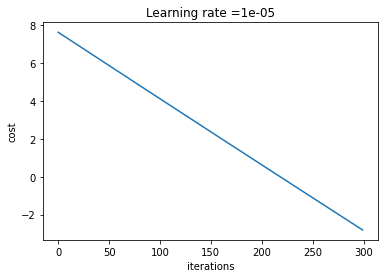

In [22]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(L))
plt.show()

### Method2

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

XX = add_intercept(x_train)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.          3.31616196 -0.67010558 ... -1.99985681  0.90236307
   0.35241996]
 [ 1.          0.51968377 -0.387402   ... -1.0626813  -0.86300883
  -0.93981891]
 [ 1.          2.44226252 -0.387402   ... -2.13373903  1.25543745
  -0.2013967 ]
 ...
 [ 1.         -0.87855533 -0.33086129 ... -0.05856467 -0.03916861
  -0.75521335]
 [ 1.          0.34490388 -1.17897203 ... -0.92879908 -0.62762591
  -0.01679115]
 [ 1.          0.4614238  -1.06589059 ... -0.86185797 -0.62762591
   0.90623661]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

In [ ]:
cost = (-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).mean()

In [ ]:
m = y_train.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y_train)) / m
theta -= alpha * gradient

print(gradient)
print(theta)

ValueError: operands could not be broadcast together with shapes (12,) (12,951) (12,) 

In [ ]:
num_iter = 100000
cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)
    
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

### Method 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Calculating the Log-Likelihood

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate):
    weight = np.zeros(features.shape[1])
    for step in range(num_steps):
        y_hat = np.dot(features, weights)
        predictions = sigmoid(y_hat)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights    





#Building the Logistic Regression Function

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

#to run the model.


eights = logistic_regression(x_train, np.asfarray(y_train).flatten(),
                     num_steps = 30000, learning_rate =0.0000001, add_intercept=True)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### Method 4

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def costs(y_hat,y):
    cost = -(np.log(y_hat)*y) - (np.log(1-y_hat)*(1-y))/len(y)
    return cost


In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))


def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [ ]:
# Building the model
w = np.zeros(X1.shape[0])
# b = 0
L = 0.00001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent


theta, cost = gradientDescent(x_train,y_train,w,L,epochs)

ValueError: shapes (951,11) and (951,) not aligned: 11 (dim 1) != 951 (dim 0)

In [ ]:
# Building the model
w = np.zeros(X1.shape[0])
# b = 0
L = 0.00001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent
n = len(X1) # Number of elements in X1
costs = []


# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = sigmoid(np.dot(w.T,X1)) # The current predicted value of Y1
    error = -(np.log(Y_pred)*y_train) + (np.log(1-Y_pred))*(1-y_train)/len(y_train)
    cost = (np.sum(error))/n
    # cost = np.sum([val**2 for val in (Y1-Y_pred)])/n
    # cost = -(np.sum((np.log(Y_pred)*Y1)+((1-Y1)*(np.log(1-Y_pred)))))/n
    # # cost = -np.mean(Y1*(np.log(Y_pred))-(1-Y1)*np.log(1-Y_pred))
    # # loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    # cost = np.squeeze(np.array(cost))
    costs.append(cost)
    D_w = (np.dot(X1,(Y_pred-Y1).T))/n  # Derivative wrt w
    # D_c = (np.sum(Y_pred-Y1))/n  # Derivative wrt b
    w = w - (L * D_w)  # Update w
    # b = b - (L * D_c)  # Update b
    print("cost {}, epochs {}".format(cost,i))
# print (w, b)
print (w)

IndexError: invalid index to scalar variable.

In [ ]:
# Building the model
w = np.zeros(X1.shape[0])
# b = 0
L = 0.00001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent
n = len(X1) # Number of elements in X1
costs = []


# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = sigmoid(np.dot(w.T,X1)) # The current predicted value of Y1
    
    costs.append(cost)
    D_w = (np.dot(X1,(Y_pred-Y1).T))/n  # Derivative wrt w
    # D_c = (np.sum(Y_pred-Y1))/n  # Derivative wrt b
    w = w - (L * D_w)  # Update w
    # b = b - (L * D_c)  # Update b
    print("cost {}, epochs {}".format(cost,i))
# print (w, b)
print (w)

In [ ]:
print(cost)

42.90563308068468


## Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\movie_metadata.csv")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
len(df)

5043

In [ ]:
df.shape

(5043, 28)

In [ ]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df["color"] == "NaN"

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: color, Length: 5043, dtype: bool

In [ ]:
df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')